In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

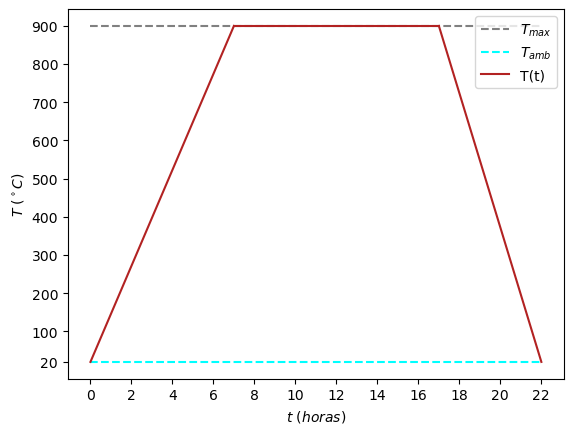

In [3]:
xup = np.linspace(0, 7)
xcons = np.linspace(7, 17)
xdown = np.linspace(17, 22)
xtotal = np.linspace(0, 22, 2)

yup = 880/7*xup + 20
ycons = xcons*0 + 900
ydown = 900 - 880/5*(xdown-17)

plt.plot(xtotal, np.ones(2)*900, '--', color = 'gray', label = r'$T_{max}$')
plt.plot(xtotal, np.ones(2)*20, '--', color = 'aqua', label = r'$T_{amb}$')
plt.plot(xup, yup, '-', color='firebrick', label = 'T(t)')
plt.plot(xcons, ycons, '-', color='firebrick')
plt.plot(xdown, ydown, '-', color='firebrick')

plt.xlabel(r'$t \ (horas)$')
plt.ylabel(r'$T \ (^\circ C)$')

plt.xticks(np.arange(0, 23, 2))
plt.yticks((20, *np.linspace(100, 900, 9)))

plt.legend(loc='upper right')

plt.savefig('temp.png')

In [4]:
with open('rx.txt', 'r') as data:
    counts = np.array(data.read().split()).astype(np.int32)

p = np.array([0.0125, 0.0375, 0.1, 0.7, 0.1, 0.0375, 0.0125])
#p = np.array([1/100, 98/100, 1/100])

def soft(arr, p):
    s = p.size
    temp = np.copy(arr)
    for ii in range(arr.size-s):
        temp[ii+int(s//2)] = np.dot(p, arr[ii:ii+s])
    return temp

def get_soft(arr, num=1):
    for ii in range(num): arr = soft(arr, p)
    return arr

Text(0.5, 0, '$2\\theta$')

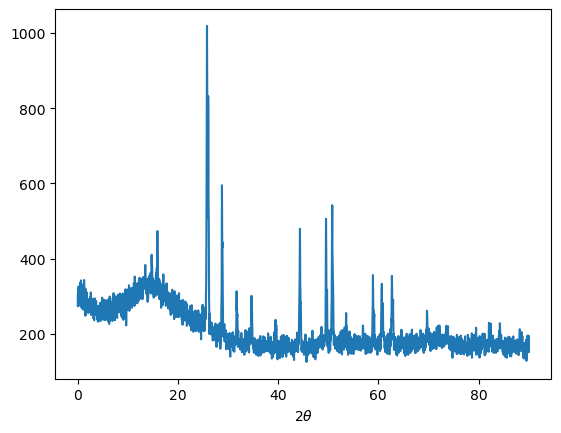

In [7]:
from matplotlib import animation as ani
double_angle = np.linspace(0, 90, counts.size)

fig = plt.figure()
ax = fig.add_subplot()

"""def func(ii):
    plt.clf()
    graph = get_soft(counts, ii)
    plt.ylim((0,1100))
    return plt.plot(double_angle, graph)

gif = ani.FuncAnimation(fig, func, repeat=True, frames=10, interval=100)
gif.save('softxd.gif')"""


ax.plot(double_angle, get_soft(counts))
plt.xlabel(r'$2\theta$')